# K Means Clustering for Customer Data

![clustering image](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

### Clustering

Clustering: chia nhỏ dataset thành một số nhóm sao cho các điểm dữ liệu trong cùng một nhóm tương tự hơn với các điểm dữ liệu khác trong cùng nhóm hơn là với những điểm trong các nhóm khác. Nói một cách đơn giản, mục tiêu là phân tách các nhóm có đặc điểm tương tự và sắp xếp chúng thành các cụm.

### KMeans Clustering 

K-means clustering: là một trong những thuật toán ML không giám sát đơn giản và phổ biến nhất. Ta sẽ xác định một *số mục tiêu k* (target number k), đề cập đến số lượng *centroids* cần thiết trong dataset. *Centroids* là vị trí tưởng tượng hoặc thực tế đại diện cho trung tâm của cụm. Mỗi điểm dữ liệu được phân bổ vào từng cụm thông qua việc giảm tổng bình phương trong cụm (*in-cluster sum of squares*). Nói cách khác, thuật toán K-means xác định k *centroids* và sau đó phân bổ mỗi điểm dữ liệu đến cụm gần nhất, trong khi giữ cho các *centroids* nhỏ nhất có thể. 'Means' trong K-means đề cập đến việc tính trung bình dữ liệu; tức là, tìm kiếm *centroids*.

### Dữ liệu đầu vào

Dữ liệu đầu vào cho biết một số thông tin cơ bản (ID, age, gender, income, spending score) về khách hàng của một trung tâm thương mại. *Spending Score* là thứ ta gán cho khách hàng dựa trên các tham số mà đã xác định như hành vi khách hàng và dữ liệu mua sắm.


## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load dataset


In [2]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


## Data Exploration

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**NHẬN XÉT:**

Tuổi trung bình là: 38.85 (+- 13.97)

Thu nhập trung bình ($): 60560 (+- 26264)

Độ tuổi khảo sát: 18 - 70

Thu nhập min - max (k$): 15 - 137


### Tìm các điểm dữ liệu khuyết (loại bỏ nếu có)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Không tìm thấy điểm dữ liệu khuyết nào cả, ta sẽ tiến hành với toàn bộ dataset ban đầu

## Biểu đồ phân phối

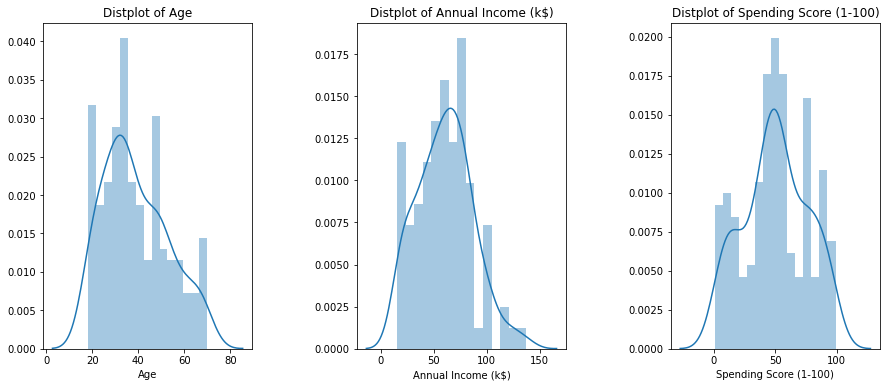

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

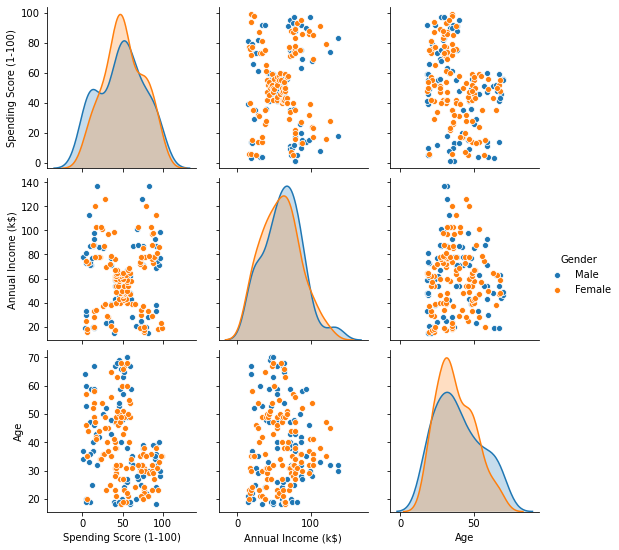

In [9]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

## Ứng dụng thuật toán K-Means

## Scale data

Scaling giúp cho các đặc trưng khác nhau được đánh giá một cách công bằng hơn. Ở đây, chúng ta scale tất cả dữ liệu số thành độ lệch chuẩn so với giá trị trung bình.

In [10]:
for col in df.select_dtypes(include=['number']).columns:
    avg = df[col].mean()
    sd = df[col].std()
    df[col] = df[col].apply(lambda x: (x - avg)/sd)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.719098,Male,-1.421003,-1.734646,-0.433713
1,-1.701821,Male,-1.277829,-1.734646,1.192711
2,-1.684543,Female,-1.349416,-1.696572,-1.711618
3,-1.667266,Female,-1.134655,-1.696572,1.037814
4,-1.649989,Female,-0.561958,-1.658498,-0.394989


## 2D Clustering: Age & Spending Score

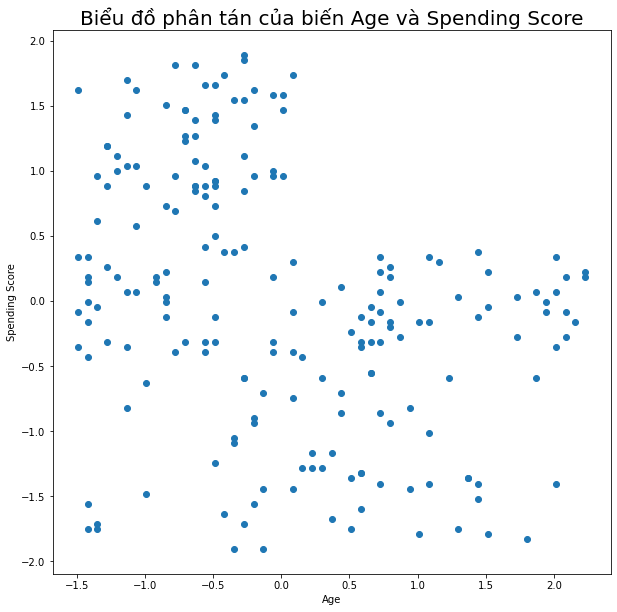

In [11]:
plt.figure(figsize = (10 , 10))
plt.title('Biểu đồ phân tán của biến Age và Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df)
plt.show()

In [12]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

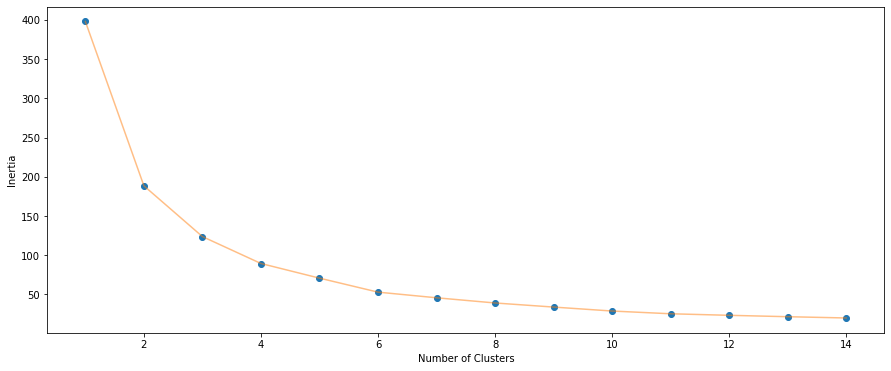

In [13]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Dựa vào đồ thị trên và nguyên tắc cổ tay, ta có thể chọn số k trong khoảng từ 2 đến 6, cụ thể hơn là 4 hoặc 5. 

### Apply KMeans với k=4

In [14]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [15]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

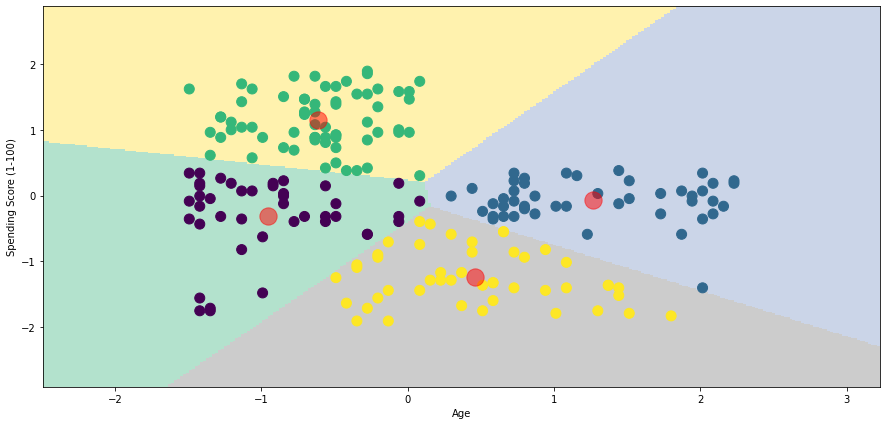

In [16]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### Applying KMeans với k=5

In [17]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [18]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

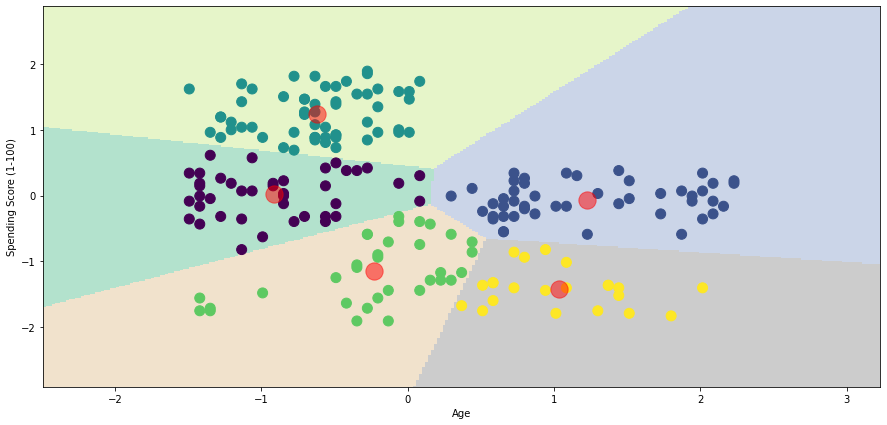

In [19]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## 2D Clustering: Annual Income & Spending Score

In [20]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

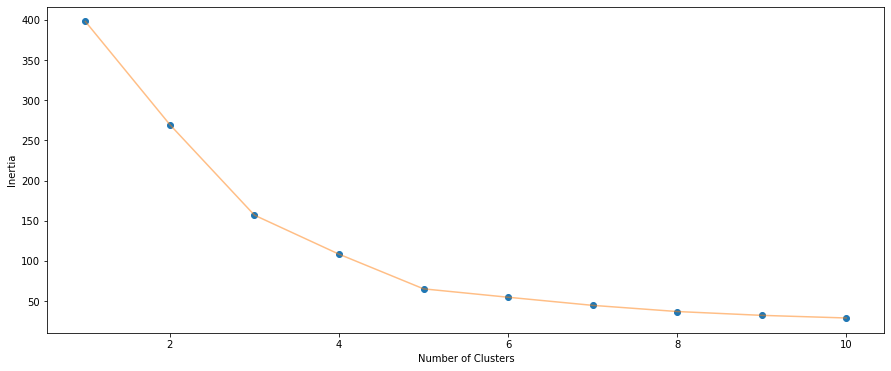

In [21]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [23]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

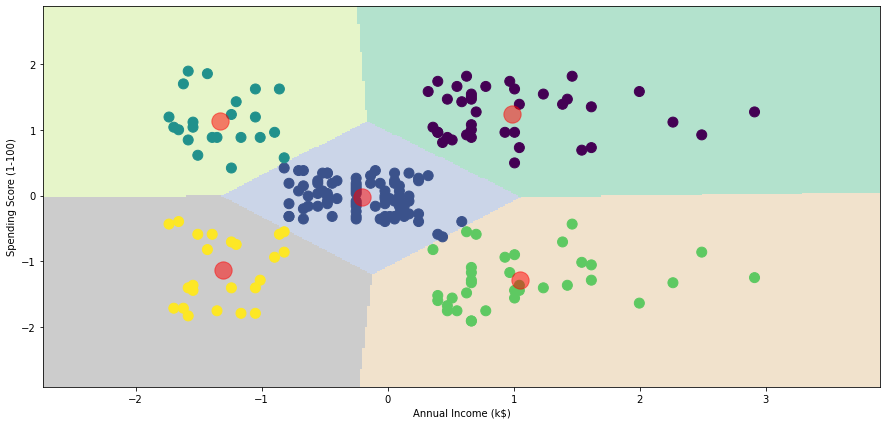

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

## 3D Clustering: Age , Annual Income & Spending Score

In [25]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

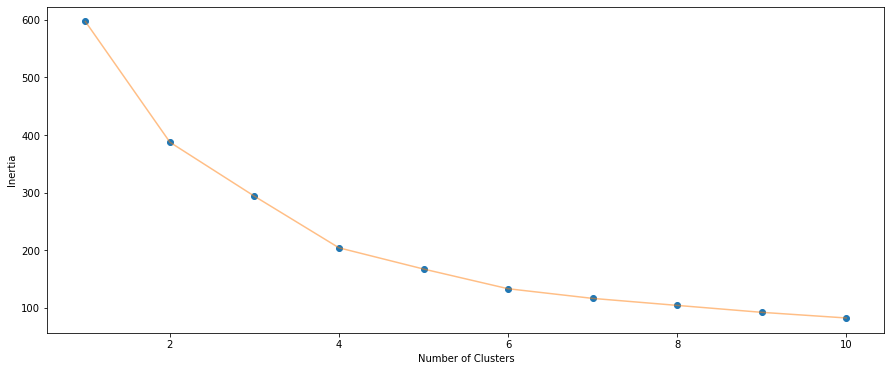

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.719098,Male,-1.421003,-1.734646,-0.433713,2
1,-1.701821,Male,-1.277829,-1.734646,1.192711,2
2,-1.684543,Female,-1.349416,-1.696572,-1.711618,5
3,-1.667266,Female,-1.134655,-1.696572,1.037814,2
4,-1.649989,Female,-0.561958,-1.658498,-0.394989,5


In [28]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.719098,Male,-1.421003,-1.734646,-0.433713,2
1,-1.701821,Male,-1.277829,-1.734646,1.192711,2
2,-1.684543,Female,-1.349416,-1.696572,-1.711618,5
3,-1.667266,Female,-1.134655,-1.696572,1.037814,2
4,-1.649989,Female,-0.561958,-1.658498,-0.394989,5


In [30]:
df.to_csv("segmented_customers.csv", index = False)

### Kết 

Thông tin phân cụm sẽ giúp ích trong việc đưa ra các chiến lược kinh doanh hiệu quả hơn, góp phần định hướng chiến lược trực tiếp tới các nhóm đối tượng nhỏ có những sự tương đồng nhất định. 